## 概要
これまでの実験ではニューロンの時間スケール$\alpha_{main}, \alpha_{sub}$を固定して学習を行なったが、これを学習可能にした条件下で同様にモデルの学習を実施した。

この条件のもとで、時間スケールの分布がどのようなものになるのかを調べるのが目的である。

なお、学習はpriorが切り替わる確率$p_t$を変えた4つの環境でそれぞれ実施し、「priorの時間スケール」とニューロンの時間スケールの間にある関係についても調べた。

In [60]:
import os
import math

import matplotlib
import numpy as np
import sys
import scipy
import yaml

from sklearn.metrics import mean_squared_error

sys.path.append('../')
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from matplotlib import cm

from slow_reservoir.model import RNNTrainableAlpha, RNNSimple
from slow_reservoir.dataset.dynamic_state import State

%matplotlib inline

### $p_t=0.3$: 非常に早くpriorが変わる環境

In [61]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220609_fast_env/20220609_fast_env.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    n_reservoir=cfg['MODEL']['RESERVOIR'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_fast_list = np.zeros(200*11)
alpha_slow_list = np.zeros(50*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_fast_list[i*200: (i+1)*200] = model.alpha_fast.detach().numpy()
    alpha_slow_list[i*50: (i+1)*50] = model.alpha_slow.detach().numpy()



model_name:  20220609_fast_env


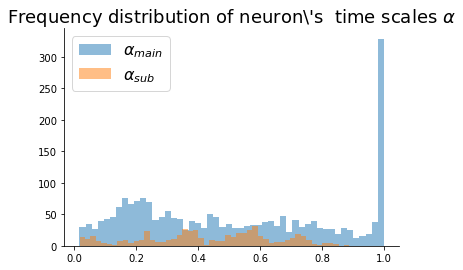

In [62]:
plt.hist(alpha_fast_list, bins=50, alpha=0.5, label=r'$\alpha_{main}$')
plt.hist(alpha_slow_list, bins=50, alpha=0.5, label=r'$\alpha_{sub}$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r'Frequency distribution of neuron\'s  time scales $\alpha$', fontsize=18)
plt.show()

### $p_t=0.1$: 中程度の速度でpriorが切り替わる環境

In [63]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220609_middle_env/20220609_middle_env.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    n_reservoir=cfg['MODEL']['RESERVOIR'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_fast_list = np.zeros(200*11)
alpha_slow_list = np.zeros(50*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_fast_list[i*200: (i+1)*200] = model.alpha_fast.detach().numpy()
    alpha_slow_list[i*50: (i+1)*50] = model.alpha_slow.detach().numpy()



model_name:  20220609_middle_env


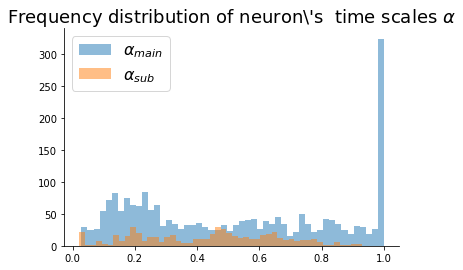

In [64]:
plt.hist(alpha_fast_list, bins=50, alpha=0.5, label=r'$\alpha_{main}$')
plt.hist(alpha_slow_list, bins=50, alpha=0.5, label=r'$\alpha_{sub}$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r'Frequency distribution of neuron\'s  time scales $\alpha$', fontsize=18)
plt.show()

### $p_t=0.03$: ゆっくりとpriorが切り替わる環境

In [65]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220609_slow_env/20220609_slow_env.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    n_reservoir=cfg['MODEL']['RESERVOIR'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_fast_list = np.zeros(200*11)
alpha_slow_list = np.zeros(50*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_fast_list[i*200: (i+1)*200] = model.alpha_fast.detach().numpy()
    alpha_slow_list[i*50: (i+1)*50] = model.alpha_slow.detach().numpy()



model_name:  20220609_slow_env


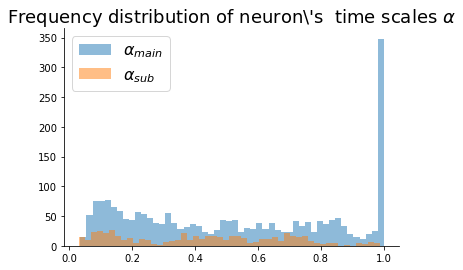

In [66]:
plt.hist(alpha_fast_list, bins=50, alpha=0.5, label=r'$\alpha_{main}$')
plt.hist(alpha_slow_list, bins=50, alpha=0.5, label=r'$\alpha_{sub}$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r'Frequency distribution of neuron\'s  time scales $\alpha$', fontsize=18)
plt.show()

### $p_t=0$: 完全にpriorが停止した環境

In [67]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220609_stable_env/20220609_stable_env.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    n_reservoir=cfg['MODEL']['RESERVOIR'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_fast_list = np.zeros(200*11)
alpha_slow_list = np.zeros(50*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_fast_list[i*200: (i+1)*200] = model.alpha_fast.detach().numpy()
    alpha_slow_list[i*50: (i+1)*50] = model.alpha_slow.detach().numpy()



model_name:  20220609_stable_env


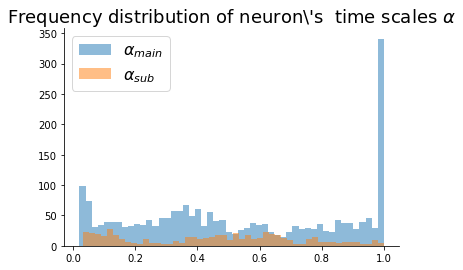

In [68]:
plt.hist(alpha_fast_list, bins=50, alpha=0.5, label=r'$\alpha_{main}$')
plt.hist(alpha_slow_list, bins=50, alpha=0.5, label=r'$\alpha_{sub}$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r'Frequency distribution of neuron\'s  time scales $\alpha$', fontsize=18)
plt.show()

## 考察

まずサブネットワークのニューロンの時間スケールの分布には特徴が見られず、メインネットワークのみで推論が行われていることが示唆される。

メインネットワークのニューロンの時間スケールに着目すると、どの環境で学習した場合でも速いニューロン($\alpha_{main}=1$)と遅いニューロン($\alpha_{main}=0\sim 0.25$)の集団に分かれていることが分かる。これは時間スケールが分離しているほうがベイズ推定に有利というこれまでの結果と整合する。

また、遅いニューロンの平均的な時間スケールは、環境の時間スケールが速くなるにつれて速くなっていることも確認できる。この現象がどのような原理に基づくものであるかは引き続き調べていく必要がある。